In [ ]:
# common

import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

def plot(x_label, y_label, fill, y=None):
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    line_x = np.linspace(0, 1, 100)
    if fill:
        plt.plot(line_x, y(line_x), lw=3, color='w')
        plt.fill_between(line_x, y(line_x), 1, color='b', alpha=.25)
        plt.fill_between(line_x, y(line_x), 0, color='r', alpha=.25)
    else:
        plt.plot(line_x, y(line_x), lw=3, color='k', alpha=.25)

    plt.xlabel(x_label, size=16)
    plt.ylabel(y_label, size=16)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def seed():
    np.random.seed(0)
    
plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
# redundant feature

def y(x):
    return 0 * x + .5

seed();

n_dots = 30

positive_noise = np.random.random(n_dots) * .45 + .05
negative_noise = np.random.random(n_dots) * .45 + .05
positive_x = np.random.uniform(size=n_dots)
negative_x = np.random.uniform(size=n_dots)

plt.plot(positive_x, y(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y(negative_x) - negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', True, y)

In [ ]:
# linear and quadratic boundary

def y(x):
    return x

def y2(x):
    return 2 * x ** 2 - .8 * x + .3

seed();

n_dots = 20

positive_noise = np.random.normal( .3, .1, n_dots)
negative_noise = np.random.normal(-.3, .1, n_dots)
positive_x = np.random.uniform(size=n_dots)
negative_x = np.random.uniform(size=n_dots)

plt.plot(positive_x, y(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y(negative_x) + negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', True, y)

plt.plot(positive_x, y2(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y2(negative_x) + negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', True, y2)

In [ ]:
# decision tree boundary

X1 = [8, 9, 6, 9.5, 6]
Y1 = [6, 7, 9, 8.5, 7]

X2 = [4, 3, 7, 2, 1]
Y2 = [2, 1, 3, 4, 8]

plt.plot(X1, Y1, 'bo')
plt.plot(X2, Y2, 'rx')

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.axhline(y=5, color='w', linestyle='-', lw=3)
plt.axvline(x=4, ymin=0.5, ymax=1, color='w', linestyle='-', lw=3)

plt.fill([0,0,4,4] ,[5,10,10,5], alpha=.25, color='r')
plt.fill([0,0,10,10] ,[0,5,5,0], alpha=.25, color='r')
plt.fill([4,4,10,10] ,[5,10,10,5], alpha=.25, color='b')

plt.xlabel(r'$x_1$', size=16)
plt.ylabel(r'$x_2$', size=16)
plt.xticks([])
plt.yticks([])
plt.show()

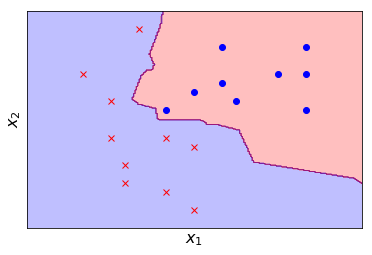

In [125]:
# knn boundary
X1 = np.array([2, 1.8, 1.5, 1.4, 2, 1.8, 1.4, 1.5, 1.2, 1.6])
Y1 = np.array([1.7, 1.8, 1.5, 1.8, 1, 1.2, 2.2, 1.3, 2.5, 3.0])
X2 = np.array([2, 2.3, 2.2, 2.8, 2.8, 2.6, 2.2, 2.8, 1.8])
Y2 = np.array([2.3, 2.2, 2.4, 2.5, 2.1, 2.5, 2.8, 2.8, 2.1])

X_neg = np.hstack((X1[:,np.newaxis], Y1[:,np.newaxis]))
X_pos = np.hstack((X2[:,np.newaxis], Y2[:,np.newaxis]))
X = np.vstack((X_neg, X_pos))
y = np.array([-1]*10 + [1]*9)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

x_min, x_max = X1.min() - 3, X1.max() + 3
y_min, y_max = Y1.min() - 3, Y1.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.25, colors=('b', 'r'))

# plot also the training points
plt.plot(X1, Y1, 'rx')
plt.plot(X2, Y2, 'bo')

plt.xlim(0.8, 3.2)
plt.ylim(0.8, 3.2)
plt.xlabel(r'$x_1$', size=16)
plt.ylabel(r'$x_2$', size=16)
plt.xticks([])
plt.yticks([])
plt.show()

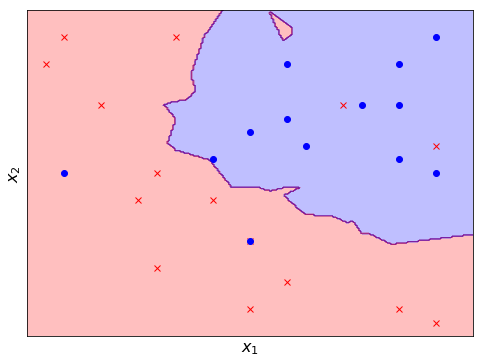

In [124]:
# knn boundary 2
X1 = np.array([1.0, 2.0, 1.8, 1.5, 1.4, 2.0, 0.9, 2.2, 3.0, 2.8, 1.5, 1.2, 1.6, 3, 2.5, 1])
Y1 = np.array([3.0, 1.5, 1.8, 2.0, 1.8, 1.0, 2.8, 1.2, 0.9, 1.0, 1.3, 2.5, 3.0, 2.2, 2.5, 0.4])
X2 = np.array([2.0, 2.3, 2.2, 2.8, 2.8, 2.6, 2.2, 2.8, 1.8, 3.0, 1.0, 2.0, 3.0])
Y2 = np.array([2.3, 2.2, 2.4, 2.5, 2.1, 2.5, 2.8, 2.8, 2.1, 3.0, 2.0, 1.5, 2.0])

X_neg = np.hstack((X1[:,np.newaxis], Y1[:,np.newaxis]))
X_pos = np.hstack((X2[:,np.newaxis], Y2[:,np.newaxis]))
X = np.vstack((X_neg, X_pos))
y = np.array([-1]*16 + [1]*13)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = Y1.min() - 1, Y1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=.25, colors=('r', 'b'))

# plot also the training points
plt.plot(X1, Y1, 'rx')
plt.plot(X2, Y2, 'bo')

plt.xlim(0.8, 3.2)
plt.ylim(0.8, 3.2)
plt.xlabel(r'$x_1$', size=16)
plt.ylabel(r'$x_2$', size=16)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# linear and quadratic regression

def y(x):
    return x

def y2(x):
    return 2 * x ** 2 - .8 * x + .3

seed();

n_dots = 20

noise = np.random.normal(0, .05, n_dots)
x = np.random.uniform(size=n_dots)

plt.plot(x, y(x) + noise, 'ko')
plot(r'$x$', r'$y$', False, y)

#plt.plot(x, y2(x) + noise, 'bo')
#plot(r'$x$', r'$y$', False, y2)

In [ ]:
# linear boundary 3d

def y(x1, x2):
    return x1 + x2 + 0.1

seed();

n_dots = 30;

p_noise = np.random.normal( .3, .1, n_dots)
n_noise = np.random.normal(-.3, .1, n_dots)
p_x1, p_x2 = np.random.uniform(size=n_dots), np.random.uniform(size=30)
n_x1, n_x2 = np.random.uniform(size=n_dots), np.random.uniform(size=30)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='k', linewidth=0, alpha=.25)
ax.scatter(p_x1, p_x2, y(p_x1, p_x2) + p_noise + 1, c='b', marker='o')
ax.scatter(n_x1, n_x2, y(n_x1, n_x2) + n_noise - 1, c='r', marker='x')

ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)
ax.set_zlabel(r"$x_3$", size=16)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [ ]:
# regression 2d

from mpl_toolkits.mplot3d import Axes3D

def y(x1, x2):
    return x1 + x2 + 0.1

seed();

n_dots = 60;

noise = np.random.normal(0, .2, n_dots)

_x1, _x2 = np.random.uniform(size=n_dots), np.random.uniform(size=60)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='k', linewidth=0, alpha=.25)
ax.scatter(_x1, _x2, y(_x1, _x2) + noise , c='k', marker='o')

ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)
ax.set_zlabel(r"$y$", size=16)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [ ]:
# piecewise linear regression

def y(x):
    return x**2 - 0.4 * x + 0.3

def plot_line():
    plt.plot(x, y, lw=linear_lw, color=linear_clr)

seed();

plt.xlim(-1, 1)
plt.ylim( 0, 1)

linear_clr = 'k'
linear_lw = 1
n_dots = 50

# real distribution
x = np.linspace(-1, 1, 20)
plt.plot(x, y(x), 'k', lw=10, alpha=.25)

# dots
x = np.random.uniform(size=n_dots) * 2 - 1
noise = np.random.normal(0, .05, n_dots)
plt.plot(x, y(x) + noise, 'ko')

# piecewise linear models
x = np.linspace(-.750, -.375, 2); y = -1.4 * x + 0.0500; plot_line()
x = np.linspace(-.375, -.125, 2); y = -0.9 * x + 0.2375; plot_line()
x = np.linspace(-.125,  .125, 2); y = -0.4 * x + 0.3000; plot_line()
x = np.linspace( .125,  .375, 2); y =  0.1 * x + 0.2375; plot_line()
x = np.linspace( .375,  .625, 2); y =  0.6 * x + 0.0500; plot_line()
x = np.linspace( .625, 1.000, 2); y =  1.1 * x - 0.2625; plot_line()

plt.yticks([])
plt.xticks([])
plt.xlabel(r'$x$', size=16)
plt.ylabel(r'$y$', size=16)
plt.show()

In [ ]:
# guassian mixture
from scipy.stats import norm
plt.xlim(-4, 4)

X = np.linspace(-5, 5, 100)
rv1 = norm(loc = 0, scale = .5)
p1 = rv1.pdf(X)
rv2 = norm(loc = -1, scale = 1.5)
p2 = rv2.pdf(X)
rv3 = norm(loc = 1, scale = 1)
p3 = rv3.pdf(X)

p4 = p1 + p2 + p3

plt.plot(X, p1, 'b')
plt.plot(X, p2, 'g')
plt.plot(X, p3, 'r')
plt.plot(X, p4, 'k--')
plt.yticks([])
plt.xticks([])
plt.xlabel(r'$x$', size=16)
plt.ylabel(r'$y$', size=16)
plt.show()

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

rawdata = np.loadtxt('german_credit.csv', delimiter=',', dtype=str)
feature_names = rawdata[0][1:]
X, y = np.array(rawdata[1:, 1:], dtype=np.float32), np.array(rawdata[1:, 0],np.int32)
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=['bad', 'good'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())